# Identity
Name: Michelle Nathania\
Student ID: 2702208575\
Code A (odd)

In [ ]:
# Import needed libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

In [4]:
pip show streamlit protobuf

Name: streamlit
Version: 1.44.1
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: c:\Users\miche\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 
---
Name: protobuf
Version: 5.29.4
Summary: 
Home-page: https://developers.google.com/protocol-buffers/
Author: protobuf@googlegroups.com
Author-email: protobuf@googlegroups.com
License: 3-Clause BSD License
Location: c:\Users\miche\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: 
Required-by: streamlit
Note: you may need to restart the kernel to use updated packages.


# Importing the dataset

In [72]:
# Import dataset
df = pd.read_csv("Dataset_A_loan.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [73]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


The dataset has been imported as seen above. This dataset is about **Loan Approval**, where:\
a. person_age = Age of the person\
b. person_gender = Gender of the person\
c. person_education = Highest education level\
d. person_income = Annual income\
e. person_emp_exp = Year of working experience\
f. person_home_ownership = Home ownership status\
g. loan_amnt = Amount of requested loan\
h. loan_intent = Intention of the loan\
i. loan_int_rate = Loan interest rate\
j. loan_percent_income = Loan amount as percentage of annual income\
k. cb_person_cred_hist_length = Credit duration in year\
l. credit_score = Credit score of the person\
m. previous_loan_defaults_on_file = Previous loan defaults on file\
n. loan_status (target variable) = Loan status; 1: approved, 0: rejected

# Exploratory Data Analysis
EDA is necessary so we gain deeper understanding of the data and understand what key preprocessing measures are suitable for the data.

## Check number of rows and columns

In [74]:
'''
The df.shape syntax will return 2 arguments,
the first index showing the number of rows, and the second showing the number of columns.
Example: [10, 24] means the data has 10 rows and 24 columns.
For better readability, I will call the df.shape[0] for rows and df.shape[1] for columns.
'''
print(f"# of rows: ", df.shape[0])
print(f"# of columns: ", df.shape[1])

# of rows:  45000
# of columns:  14


This dataset has 45000 rows and 14 columns.

## Check the data information
By using df.info(), we are able to obtain information such as the column names, non-null count for each column, and the datatype. It's like killing two birds with one stone -- understanding multiple information of the dataset at once.

In [75]:
# Check number of columns, non-null rows, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Here, we can see the data type and the non-null count of each column. This can be a pre-screen of how many null values do we have in the dataset, and it is clearly stated that **person_income has some null values**. We will see the distribution of the data first. If it is normally distributed, mean imputation will be done. If it is skewed, median imputation will be done. Imputation will be performed after train test split to avoid data leakage.

## Check duplicated data
Remove any because it is redundant.

In [76]:
# Check duplicated data
sum(df.duplicated())

0

We can see that the data does not have duplicated value, so no removing method shall be done.

## Check categorical data distribution
I split the column name to numerical and categorical data based on the data type, then I check the cardinality or unique values of each categorical column.

In [77]:
# Initializing empty lists to store the variables name
num = [] # numerical
cat = [] # categorical

# Dividing the variables into the corresponding list
for i in df.columns:
    if df[i].dtype == 'object' or i == 'loan_status': # Insert loan status to the cat variable because it's binary
        cat.append(i)
    else:
        num.append(i)

# Checking cardinality first
for i in cat:
  print(f"Column {i}")
  print(df[i].value_counts())
  print("")

Column person_gender
person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64

Column person_education
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

Column person_home_ownership
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

Column loan_intent
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

Column previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

Column loan_status
loan_status
0    35000
1    10000
Name: count, dtype: int64



In [78]:
num

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

There is a problem in the person_gender column, where the values are inconsistent. The gender should be either 'male' or 'female', but there are some values written inconsistently as 'Male' and 'fe male'. This will be handled during the encoding, so 'male' and 'Male' will be encoded as 0 and 'female' and 'fe male' will be encoded as 1. The other categories have normal values so they only need to be encoded.
- Label encoding: person_gender (binary), previous_loan_defaults_on_file (binary), person_education (ordinal)
- One hot encoding: person_home_ownership, loan_intent

## Check numerical data statistics

In [79]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Above is the statistical summary of the numerical variables detected in the dataset. Some anomalies noticed:
- Person age reaches 144 years old, which is unlikely. Based on this [source](https://gero.usc.edu/cga/superagers/the-worlds-longest-lived/), the longest life expectancy for human in the world is 122 years old. The average highest life expectancy is around 80 years.
- The same goes for the year of working experience (person_emp_exp) that reaches 125 years -- meaning that a person has worked for more than 100 years, which is highly unlikely.
- Other than that, the statistical summary should be fine.

## Check correlation

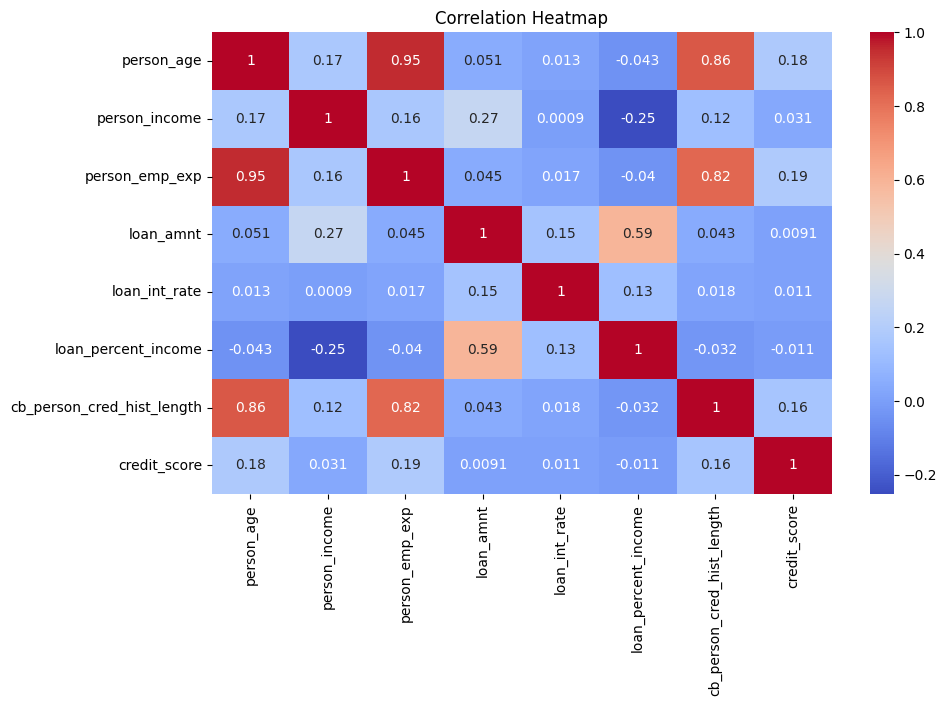

In [80]:
# Check correlation
num_col = df[num]

plt.figure(figsize=(10, 6))
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The correlation between numerical variables, focusing on person_age, person_emp_expnd cb_person_cred_hist_length, is very high. Probably because the older someone gets, the longer their working experience, so it results in multicollinearity. However, when using robust models such as Random Forest Classifier and XGB Classifier, the multicollinearity does not really matter, so we can keep both variables. This is a serious problem when we are using linear models.

## Data clipping

In [81]:
# Check the number of data points with age >= 120
df[df['person_age'] >= 120]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,NaN,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0


There are 5 data points with the person_age >= 120. I will do winsorization to keep the data within the normal range, but not capping too much data/too wildly so there is still some variability. The same also goes for person_emp_exp, I will cap the max value to 80 (assuming people start working at the age of 20 and retire at the age 80, but leaving more 20 years for rare cases where people start working earlier/retire later).

In [82]:
# Winsorization
df['person_age'] = df['person_age'].clip(upper=120)
df['person_emp_exp'] = df['person_emp_exp'].clip(upper=80)

df[df['person_age'] >= 120]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,120.0,male,Bachelor,300616.0,80,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,120.0,male,Associate,241424.0,80,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,120.0,female,High School,97140.0,80,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,120.0,male,Bachelor,94723.0,80,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,120.0,female,Associate,NaN,80,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0


We can see that the max age is now 120 and the max employment experience is now 80, cutting the extreme values but still preserving variability.

## Check numerical data distribution
Distribution will be checked using histogram and boxplot to detect outliers and skewness. The observation result may lead us to preprocess the data properly, such as choosing the scaler method.

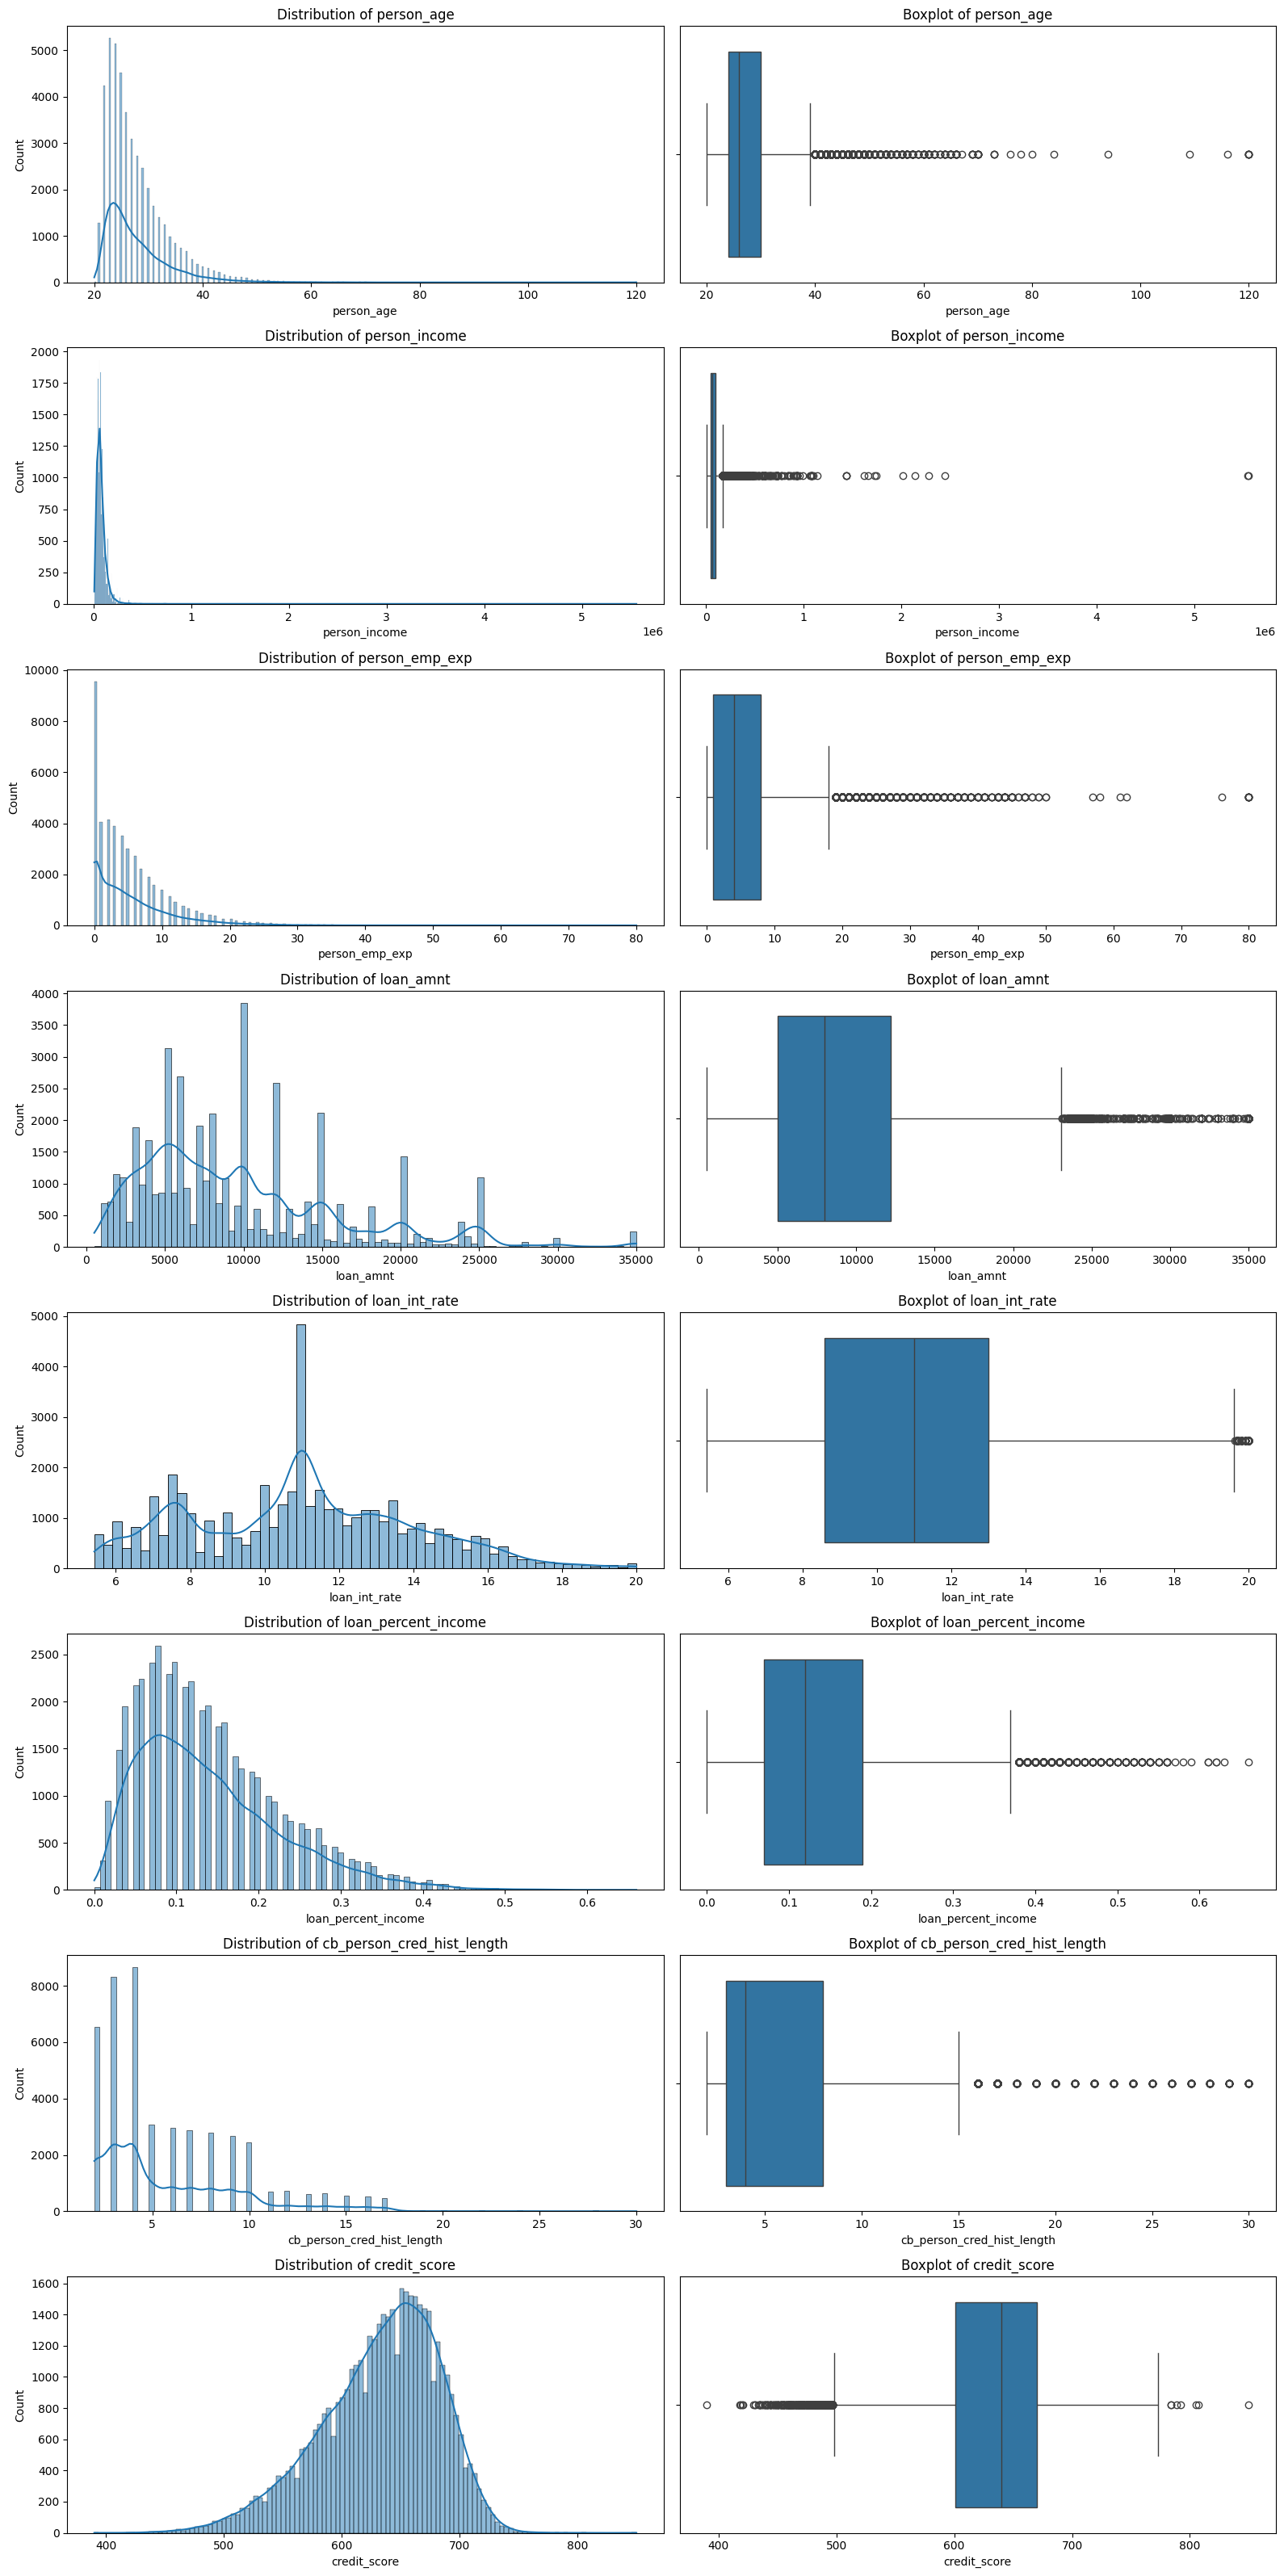

In [83]:
plt.figure(figsize=(16, 4 * len(num)))

for i, col in enumerate(num):
    plt.subplot(len(num), 2, 2*i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(len(num), 2, 2*i + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [84]:
# Check skewness
num_col.skew()

person_age                     2.548154
person_income                 25.606739
person_emp_exp                 2.594917
loan_amnt                      1.179731
loan_int_rate                  0.213784
loan_percent_income            1.034512
cb_person_cred_hist_length     1.631720
credit_score                  -0.610261
dtype: float64

Based on the histogram and boxplot for each numerical variable, the numerical variables are mostly right-skewed, and credit score seems a bit left-skewed. This is further confirmed by the skewness value. Based on the skewness value, if the value > +1, the variable is right-skewed. On the other hand, if the value < -1, the variable is left skewed. **Almost all variables are proven to be right-skewed**, especially person_income with the skewness value 25.6. Remember that earlier, person_income has several NAs, so we will do **median imputation** instead of mean imputation because the data is skewed.

We can see as well that **all variables have outliers**, marked by the (o) symbol on the boxplot. Therefore, it's better to scale them using **Robust Scaler** later to normalize the values of the data.

# Data preprocessing
Looking at the observation result from EDA, the key preprocessing to be done:
- Value mapping for categorical data (person_gender (binary), previous_loan_defaults_on_file (binary), person_education (ordinal)).
- Train test split 70/30 because we have many data points.
- One hot encoding for categorical data (person_home_ownership, loan_intent).
- Median imputation for NA present in person_income.
- Robust Scaler for all numerical variables.

## Value mapping

In [85]:
# Manual mapping to keep the ordinality
# person_gender
def gender_map(x):
    x = x.lower().replace(' ', '') # change to lowercase & remove space
    if x == 'male':
        return 0
    else:
        return 1

# prev_loan
def prev_loan_map(x):
    if x == 'Yes':
        return 1
    else:
        return 0

# person_education
def edu_map(x):
    if x == 'High School':
        return 0
    elif x == 'Associate':
        return 1
    elif x == 'Bachelor':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Doctorate':
        return 4

In [86]:
# Apply mapping
df['person_gender'] = df['person_gender'].map(gender_map)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(prev_loan_map)
df['person_education'] = df['person_education'].map(edu_map)

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,3,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1
1,21.0,1,0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
2,25.0,1,0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,0,1
3,23.0,1,2,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,0,1
4,24.0,0,3,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,0,1


Now, the values in person_gender, person_education, and previous_loan_defaults_on_file have been changed to numerical values.

## Train test split

In [87]:
# X and y
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [88]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data: {X_train.shape[0]}")
print(f"Testing data: {X_test.shape[0]}")

Training data: 31500
Testing data: 13500


In [89]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
30159,38.0,0,1,41579.0,14,RENT,5750.0,MEDICAL,11.01,0.14,16.0,647,1
6777,24.0,1,1,28052.0,3,RENT,7000.0,DEBTCONSOLIDATION,10.62,0.25,3.0,649,0
36563,28.0,1,1,NaN,4,MORTGAGE,7000.0,EDUCATION,16.26,0.11,5.0,626,1
11784,26.0,0,1,91870.0,3,MORTGAGE,1200.0,PERSONAL,10.25,0.01,2.0,662,0
10370,22.0,0,3,29550.0,0,RENT,10000.0,DEBTCONSOLIDATION,11.01,0.34,3.0,633,0


Our data is split into X_train, X_test, y_train, and y_test. Now we can do further preprocessing steps.

## One hot encoding

In [90]:
# One hot encoding
to_encode = ['person_home_ownership', 'loan_intent']
ohe = OneHotEncoder(sparse_output=False)
encoder_ohe = ohe.fit_transform(X_train[to_encode])
encoded_df = pd.DataFrame(encoder_ohe, columns=(ohe.get_feature_names_out(to_encode)), index=X_train.index)
X_train = pd.concat([X_train, encoded_df], axis=1)
X_train = X_train.drop(to_encode, axis = 1)

# Check the new data after OHE
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
30159,38.0,0,1,41579.0,14,5750.0,11.01,0.14,16.0,647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6777,24.0,1,1,28052.0,3,7000.0,10.62,0.25,3.0,649,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
36563,28.0,1,1,NaN,4,7000.0,16.26,0.11,5.0,626,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11784,26.0,0,1,91870.0,3,1200.0,10.25,0.01,2.0,662,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10370,22.0,0,3,29550.0,0,10000.0,11.01,0.34,3.0,633,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# One hot encoding for test dataset
encoder_ohe_test = ohe.transform(X_test[to_encode])
encoded_df_test = pd.DataFrame(encoder_ohe_test, columns=(ohe.get_feature_names_out(to_encode)), index=X_test.index)
X_test = pd.concat([X_test, encoded_df_test], axis=1)
X_test = X_test.drop(to_encode, axis = 1)

# Check the new data after OHE
X_test.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
37979,32.0,0,1,96865.0,10,7500.0,6.04,0.08,10.0,601,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9911,24.0,0,1,56838.0,6,9000.0,11.49,0.16,4.0,647,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43386,22.0,1,3,37298.0,0,5000.0,14.88,0.13,4.0,711,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13822,23.0,1,2,39944.0,1,5000.0,13.99,0.13,3.0,597,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44810,42.0,0,0,67974.0,20,10000.0,15.41,0.15,11.0,586,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The variables person_home_ownership and loan_intent in both the train & test dataset have been encoded using One Hot Encoder.

## Null handling
- Check number of NA in train and test data
- Find median of person_income in train data
- Fill NA in X_train adn X_test with the X_train median
- Recheck number of NA in train and test data

In [92]:
X_train.isna().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     1556
person_emp_exp                       0
loan_amnt                            0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
person_home_ownership_MORTGAGE       0
person_home_ownership_OTHER          0
person_home_ownership_OWN            0
person_home_ownership_RENT           0
loan_intent_DEBTCONSOLIDATION        0
loan_intent_EDUCATION                0
loan_intent_HOMEIMPROVEMENT          0
loan_intent_MEDICAL                  0
loan_intent_PERSONAL                 0
loan_intent_VENTURE                  0
dtype: int64

In [93]:
X_test.isna().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                     694
person_emp_exp                      0
loan_amnt                           0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
person_home_ownership_MORTGAGE      0
person_home_ownership_OTHER         0
person_home_ownership_OWN           0
person_home_ownership_RENT          0
loan_intent_DEBTCONSOLIDATION       0
loan_intent_EDUCATION               0
loan_intent_HOMEIMPROVEMENT         0
loan_intent_MEDICAL                 0
loan_intent_PERSONAL                0
loan_intent_VENTURE                 0
dtype: int64

In [94]:
# Get median from train
med_income = float(np.nanmedian(X_train['person_income']))
med_income

67104.5

In [95]:
# Fill NA in train and test data
X_train['person_income'] = X_train['person_income'].fillna(med_income)
X_test['person_income'] = X_test['person_income'].fillna(med_income)

In [96]:
# Recheck number of NA
X_train.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
dtype: int64

In [97]:
X_test.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
dtype: int64

The NA in both X_train and X_test have been handled.

## Robust Scaling
Use scaling to normalize data so they fall within the same range (so the model trains better). We will use Robust Scaler becasue the data is skewed.

In [98]:
# Value before scaling
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
30159,38.0,0,1,41579.0,14,5750.0,11.01,0.14,16.0,647,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6777,24.0,1,1,28052.0,3,7000.0,10.62,0.25,3.0,649,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
36563,28.0,1,1,67104.5,4,7000.0,16.26,0.11,5.0,626,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11784,26.0,0,1,91870.0,3,1200.0,10.25,0.01,2.0,662,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10370,22.0,0,3,29550.0,0,10000.0,11.01,0.34,3.0,633,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Scaling for all X variables
rs = RobustScaler()

# only scale numerical variables
X_train[num] = rs.fit_transform(X_train[num]) # fit transform on train
X_test[num] = rs.transform(X_test[num]) # only transform on test -> prevent data leakage

In [100]:
# Recheck values after scaling
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
30159,2.000000,0,1,-0.572382,1.428571,-0.316901,0.000000,0.166667,2.4,0.104478,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6777,-0.333333,1,1,-0.875710,-0.142857,-0.140845,-0.087444,1.083333,-0.2,0.134328,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
36563,0.333333,1,1,0.000000,0.000000,-0.140845,1.177130,-0.083333,0.2,-0.208955,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11784,0.000000,0,1,0.555339,-0.142857,-0.957746,-0.170404,-0.916667,-0.4,0.328358,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10370,-0.666667,0,3,-0.842119,-0.571429,0.281690,0.000000,1.833333,-0.2,-0.104478,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [101]:
X_test.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
37979,1.000000,0,1,0.667347,0.857143,-0.070423,-1.114350,-0.333333,1.2,-0.582090,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9911,-0.333333,0,1,-0.230215,0.285714,0.140845,0.107623,0.333333,0.0,0.104478,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
43386,-0.666667,1,3,-0.668378,-0.571429,-0.422535,0.867713,0.083333,0.0,1.059701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
13822,-0.500000,1,2,-0.609045,-0.428571,-0.422535,0.668161,0.083333,-0.2,-0.641791,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44810,2.666667,0,0,0.019498,2.285714,0.281690,0.986547,0.250000,1.4,-0.805970,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The data has been scaled and now ready for the modeling.

# Model building
- Random Forest Classifier
- XGB Classifier

In [102]:
# Training random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
lb = ['Rejected', 'Approved']

print("Classification Report Random Forest")
print(classification_report(y_test, y_pred, target_names=lb))

Classification Report Random Forest
              precision    recall  f1-score   support

    Rejected       0.94      0.97      0.95     10493
    Approved       0.89      0.77      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500



In [103]:
# Training  XGB
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Classification XGB")
print(classification_report(y_test, y_pred, target_names=lb))

Classification XGB
              precision    recall  f1-score   support

    Rejected       0.95      0.97      0.96     10493
    Approved       0.87      0.81      0.84      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.89      0.90     13500
weighted avg       0.93      0.93      0.93     13500



<Figure size 800x600 with 0 Axes>

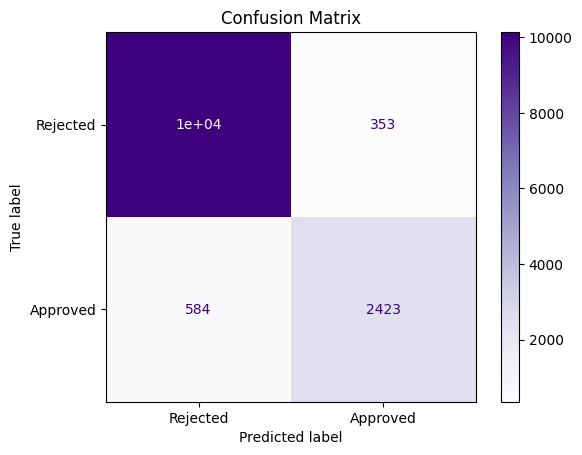

In [104]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb)

plt.figure(figsize=(8,6))
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()

## Best model
In a loan approval case, the most important metric is **recall**. Prioritizing recall means minimizing the false negatives, or simply, minimizing the number of rejected cases where the person applying for the loan can actually repay their loan. In terms of business, rejecting these cases may affect the company as well -- as they loss the potential revenue from the interest paid by the client. To mitigate the risks of false positives (accidentally approving people who shouldn't have been approved for loan), we can do further checking for the person classified as 'Approved', so we can be more sure whether to accept or reject their loan application.

Because it is generally more costly to miss out on a good borrower than to approve a risky borrower, prioritizing recall is important. Therefore, the best model with the higher recall is **XGB Classifier**, with +4% recall on 'Approved' and same recall on 'Rejected' compared to Random Forest Classifier. Considering the harmonic of recall and precision through F1-score, XGB Classifier has a better performance than Random Forest Classifier.

# Save best model as pickle
The best model is XGB Classifier and it will be saved as .pkl so we don't need to retrain the model to work with the same data in the future. Saves the time.

In [105]:
# Save the best model as pkl
with open('loan_approval_xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [106]:
# Save scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(rs, file)

In [107]:
# Save one hot encoder
with open("encoder.pkl", "wb") as file:
    pickle.dump(ohe, file)

In [108]:
# Save mapping dict
mapping = {
    'person_gender': {'male': 0, 'female': 1},
    'person_education': {'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4},
    'previous_loan_defaults_on_file': {'Yes': 1, 'No': 0}
}

with open("mapping.pkl", "wb") as f:
    pickle.dump(mapping, f)

In [109]:
# Save value clipping dict
clip_config = {
    'person_age': {'upper': 120},
    'person_emp_exp': {'upper': 80}
}

with open("clip_config.pkl", "wb") as f:
    pickle.dump(clip_config, f)